In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from uncertainty_prediction_functions import *
from downsampling_functions import *
from utils import *

In [53]:
# load eigenvectors V and eigenvalues Lambda
V = np.load('data/eigenvectors.npy')
Lambda = np.load('data/eigenvalues.npy')

# load variance factors to predict the discrepency of ancient individuals
factors = np.load('data/factors.npy')

In [54]:
def load_test_sample():
  test_sample_path = "data/downsampling/ancients_ds.geno"
  #test_sample_path = "data/downsampling/PA12.geno"
  test_sample_geno = parse_geno(test_sample_path)

  test_sample_geno = np.where(test_sample_geno==9, np.nan, test_sample_geno)

  test_sample_geno = select_snps(test_sample_geno)

  test_sample_geno = test_sample_geno[5]

  # normalization
  genomean_path = 'data/genomean.csv'
  genomean = pd.read_csv(genomean_path, header=0)
  genomean = genomean['x'].values
  snp_drift = np.sqrt((genomean / 2) * (1 - genomean/2))

  test_sample = (test_sample_geno - genomean) / snp_drift
  return test_sample


# Example usage

In [ ]:
# select one sample for testing
# loaded sample is centered, normalized and has np.nan at missing genotype loci
test_sample = np.squeeze(load_test_sample())

# Boolean vector indicating if locus observed or not
is_not_nan = ~np.isnan(test_sample)

# Predict variance of discrepency
# Use factors if sample is ancient
V_obs = V[is_not_nan]
var_discr = var_discrepency(V_obs=V_obs, var_tau_r=np.diag(Lambda[2:] * factors[2:]))

# SmartPCA projection
proj_factor = np.linalg.inv(V_obs[:, 0:2].T @ V_obs[:, 0:2]) @ V_obs[:, 0:2].T
tau_est = proj_factor @ test_sample[is_not_nan]

In [56]:
# Multiple ellipses can be computed for multiple confidence levels
ellipse1 = get_ellipse(mean=tau_est, Sigma=var_discr, confidence_level=0.5, color='lightblue')
ellipse2 = get_ellipse(mean=tau_est, Sigma=var_discr, confidence_level=0.75, color='lightblue')

Text(0, 0.5, 'PC2')

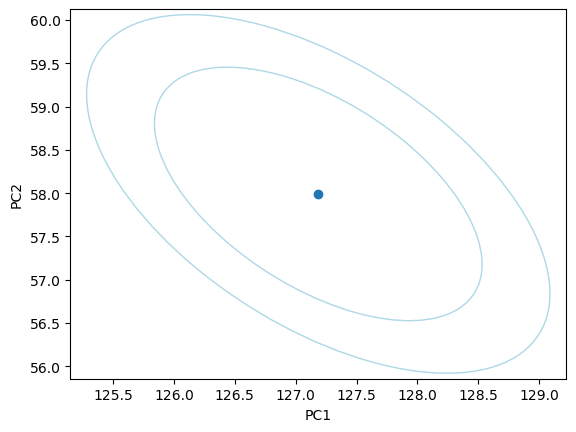

In [57]:
f, ax = plt.subplots(1, 1)
ax.scatter(tau_est[0], tau_est[1])
ax.add_patch(ellipse1)
ax.add_patch(ellipse2)
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')